<a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/02_missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data

⚠️ **NOTE:** Kaggle files have already been uploaded to the repo. You find them in folder `kaggle_data`´

If you for any reason need to download data from kaggle, instructions are in one of the [optional notebooks](./88_kaggle_data.ipynb) : <a href="https://colab.research.google.com/github/STASYA00/IAAC2024_tutorials/blob/main/notebooks/88_kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/STASYA00/IAAC2024_tutorials
%cd IAAC2024_tutorials/notebooks

In [3]:
# importing the necessary packages

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


## 🏡 Buildings' Efficiency - Missing data

### The why of missing values

There are several reasons for having missing values, some of which are:
* equipment failure (e.g. GPS sensors), missing cells in manual data entry, censored/anonymous data
* unfilled optional values (e.g. "anything else you would like to add" - question in a survey)
* data was not originally collected (two datasets were merged, one had "year" records and another one didn't)
* and so on

For us it is important to understand why the values might be missing, as it gives us an understanding of how to treat them. There are several strategies:
* Remove rows or columns with missing values (used when there are many missing values along one axis)
* Assign an arbitrary value, like 18783 or 0 as to say "this value is missing" (used when we can not remove records from the db)
* Fill in missing values using some logic (e.g. assuming the number of occupants in a building based on similar buildings around or getting the year it was built in from another data source).
    

**How to find missing values:**

[Click>>](https://www.google.com/search?q=pandas+find+missing+values&oq=pandas+find+missing+values&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQLhhA0gEINTg2N2owajGoAgCwAgA&sourceid=chrome&ie=UTF-8)

One of the methods is to check for each cell whether it is a NaN value and look at the values count that we are already familiar with:

In [64]:
metadata = pd.read_csv("/content/metadata_new", index_col=0, on_bad_lines='skip')
metadata_non_encoded = pd.read_csv("/content/metadata.csv", index_col=0, on_bad_lines='skip')
metadata.head()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,yearbuilt,numberoffloors,occupants,rating
136,432,3,0,2,4703.0,1,1,0,0,0,0,2,NaN,5.0,NaN,8
137,416,3,0,2,499.3,1,1,1,0,0,0,2,NaN,4.0,NaN,9
138,436,3,0,2,9061.0,1,1,0,0,0,0,2,2005.0,10.0,NaN,7
139,441,3,0,3,7579.0,1,1,0,0,0,0,2,1913.0,5.0,NaN,9
140,442,3,0,3,5295.0,1,1,1,0,0,0,2,1953.0,6.0,NaN,8


In [9]:
metadata.isna()

,building_id,site_id,primaryspaceusage,sub_primaryspaceusage,sqm,timezone,electricity,hotwater,water,gas,industry,subindustry,yearbuilt,numberoffloors,occupants,rating
136,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
137,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
138,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
139,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
140,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1632,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1633,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1634,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
for c in metadata.columns:
    if len(metadata[c].isna().unique())>1:
        print(metadata[c].isna().value_counts())
        print("\n")

False    199
True      52
Name: yearbuilt, dtype: int64


False    224
True      27
Name: numberoffloors, dtype: int64


True     138
False    113
Name: occupants, dtype: int64




### Dealing with missing values

**First questions to ask:**

* Why is the data missing (is there any logic in it)?
* What is the distribution of the missing data?

**Choose the strategy based on your findings:**

* Delete (rows or columns)
* Inserting a representative value (mean, median or the most likely to occur in these entries)
* Fill missing values manually 🙂
* Create a new column that would flag that the value is missing (e.g. Missing_built_year with 0 and 1 showing whether the values are missing) and use a special value in the original column. Increases the difficulty of the data mining process.
* Use data mining methods to estimate the missing value based on the rest of the dataset. Used when the feature is considered important and there is a substantial set of non-missing observations for this feature.

## Model Imputation methods

Let's go through different imputation methods. Note: these are not the best methods for each column, but rather a

### 🫧 Single value

Methods for getting `min`, `max`, `mean`, `median`:

`df[column_name].min()`

👍🏻

What could the advantages and disadvantages be when using this method with our data?

### 🫧 Nearest neighbours

[Algorithm in 94 seconds](https://www.youtube.com/watch?v=zeFt_JCA3b4)

In [11]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
cols_to_drop = ["occupants", "numberoffloors", "yearbuilt"] #, "building_id"]
X = metadata.loc[metadata["occupants"].isna()==False].drop(columns=cols_to_drop)
Y = metadata.loc[metadata["occupants"].isna()==False]["occupants"]
missing_X = metadata.loc[metadata["occupants"].isna()].drop(columns=cols_to_drop)
model.fit(X, Y)

KNeighborsRegressor()

In [12]:
missing_Y = model.predict(missing_X)
missing_Y

array([ 195.8,   18.2, 1156.4,  745.6,  344.8,  359.6, 1019.8,  341.8,
       1156.4, 1082. , 1260.6,  336.6,  194.8, 1256.2,  832. ,  507. ,
       1160.8,  745.6,  344.8,  336.6,  184.4,  294.2,  359.6, 1043.8,
       1043.8,  344.8,  415.4,  745.6,  415.4,  195.8,  415.4,  334.6,
        415.4,  865.6,  344.8,  195.8,  164.6,  164.6,  173.6,  344.8,
         81.4,  390.6,  745.6,  966. ,  745.6,  415.4,  395.8,   99.6,
        195.8,  184.4,  371.4,  239.6,   18.2,  957.2,  425. ,   66.6,
        131. ,  193.2,   37.8,  407.8,   82.4,  344.8,   71.4,  195.8,
         82.4,   71.8,  425. ,  160.2,   66.6,  164.6,   71.8,   37.8,
        129.8,  365.6, 1160.8,  216.4,   53.8,  193.2,  205.6,  365.6,
         54.6,  165.4,  129.8,  175. ,   18.2,  351.6,  129.8,   53.8,
         34.8,  376.2,  333.6,  182. ,  307.8,  397.6,  195.8, 1019.8,
         18.2,   71. ,  351.6,   23.4,   59.4,  348.8, 1214.8,   23.4,
        357.4,  359.6, 1160.8,  359.4,  884.4, 1050.2, 1050.2,  857.6,
      

Thinking about how the algorithm works, do you think some columns are more important than the others? Are there any columns that are not important?

In [13]:
model = KNeighborsRegressor(n_neighbors=5)
cols_to_drop = ["occupants", "numberoffloors", "yearbuilt", "building_id"]
X = metadata.loc[metadata["occupants"].isna()==False].drop(columns=cols_to_drop)
Y = metadata.loc[metadata["occupants"].isna()==False]["occupants"]
missing_X = metadata.loc[metadata["occupants"].isna()].drop(columns=cols_to_drop)
model.fit(X, Y)
missing_Y = model.predict(missing_X)
missing_Y

array([ 195.8,   18.2, 1156.4,  756.2,  344.8,  385.6, 1019.8,  397.6,
       1156.4, 1082. , 1260.6,  364.4,  122.2, 1256.2,  832. ,  507. ,
       1160.8,  745.6,  344.8,  364.4,  193.6,  331.4,  366.6, 1043.8,
       1043.8,  344.8,  415.4,  745.6,  415.4,  195.8,  415.4,  334.6,
        415.4, 1019.8,  344.8,  195.8,  164.6,  164.6,  193.2,  344.8,
        142. ,  397.6,  745.6,  966. ,  745.6,  415.4,  363. ,  113.2,
        195.8,  130. ,  346. ,  244.4,   18.2,  957.2,  341.8,   41.6,
        161.4,  193.2,   18.2,  385.6,   81.4,  344.8,   41.6,  195.8,
        106.4,   66.2,  341.8,  122.2,   41.6,  164.6,   85.8,   18.2,
        113.2,  364.4, 1160.8,  193.6,   41.6,  193.2,  295.6,  346. ,
         71.4,   81.4,  113.2,   70. ,   18.2,  351.6,  169. ,   41.6,
         18.2,  363. ,  301.2,  146.2,  378.2,  397.6,  195.8, 1019.8,
         18.2,  142. ,  334.6,   66.2,   85.8,  377.6, 1214.8,   71.4,
        392. ,  385.6, 1160.8,  430.6,  884.4, 1050.2, 1050.2,  857.6,
      

#### Data scaling

![data scaling illustration](https://miro.medium.com/v2/resize:fit:1400/1*yR54MSI1jjnf2QeGtt57PA.png)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
missing_X_scaled = scaler.fit_transform(missing_X)

model.fit(X_scaled, Y)
missing_Y = model.predict(missing_X_scaled)
missing_Y

array([ 306.8,  306.8,  451. ,  379.2,  306.8,  306.8,  542.4,  216. ,
        451. ,  542.4,  542.4,  306.8,  216. ,  470.6,  451. ,  306.8,
        522.2,  306.8,  306.8,  344.8,  306.8,  306.8,  432. ,  485. ,
        485. ,  485. ,  485. ,  485. ,  489. ,  485. ,  485. ,  432. ,
        379.2,  485. ,  485. ,  485. ,  485. ,  489. ,  355. ,  489. ,
        379.2,  485. ,  485. ,  485. ,  485. ,  485. ,  485. ,  379.2,
        485. ,  379.2,  485. ,  485. ,   36.4,  853. ,  116.6,  159.8,
         64.4,   56.6,  122.4,  135.8,   64.4,  120.4,   29.2,  135.8,
         29.2,   29.2,  116.6,   65.2,  122.4,  148.6,  299.2,  159.8,
        138.2,  340.2, 1275.8,  261.8,  232.6,  283.2,   68.8,  299.2,
         56.4,   56.4,   56.4,   56.4,   56.4,  271. ,  212.4,  221.2,
        295. ,  339.2,  330.6,  299.2,  294. ,  299.2,  289.2,  397. ,
        151.4,  283.8,  306.8,  122.4,   82. ,  340.2,  542.4,  311.4,
        306.8,  306.8, 1465.6,  283.8, 1323.2,  485. ,  561.4,  397. ,
      

Have you noticed anything that doesn't turn with the predicted values?

In [15]:
missing_Y = missing_Y.astype(int)

#### Assigning generated values to the column

In [16]:
metadata["occupants"].loc[metadata["occupants"].isna()] = missing_Y

<ipython-input-16-7d3f308bea34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["occupants"].loc[metadata["occupants"].isna()] = missing_Y


### 🫧 Decision Tree

![decision tree illustration](https://cdn-images-1.medium.com/max/778/1*OLJWt9hD2zTS-x3gRhYuqg.png)

In [17]:
from sklearn.tree import DecisionTreeRegressor

cols_to_drop = ["numberoffloors", "yearbuilt"]

X = metadata.loc[metadata["yearbuilt"].isna()==False].drop(columns=cols_to_drop)
Y = metadata.loc[metadata["yearbuilt"].isna()==False]["yearbuilt"]
missing_X = metadata.loc[metadata["yearbuilt"].isna()].drop(columns=cols_to_drop)

tree = DecisionTreeRegressor()
tree.fit(X, Y)

DecisionTreeRegressor()

In [18]:
zipped = [(x, i) for i,x in sorted(zip(tree.feature_importances_, X), reverse=True)]
for f, v in zipped:
    print("{:18s}\t\t{:.2f}".format(f, v))

building_id       		0.31
sqm               		0.27
occupants         		0.18
rating            		0.09
sub_primaryspaceusage		0.08
subindustry       		0.02
industry          		0.02
primaryspaceusage 		0.01
hotwater          		0.01
site_id           		0.00
gas               		0.00
water             		0.00
timezone          		0.00
electricity       		0.00


✨ **for the curious ones:**
* [zip function ](https://www.programiz.com/python-programming/methods/built-in/zip)
* [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)
* [enumerate](https://www.geeksforgeeks.org/enumerate-in-python/)

In [19]:
cols_to_drop = ["numberoffloors", "yearbuilt", "building_id"]

X = metadata.loc[metadata["yearbuilt"].isna()==False].drop(columns=cols_to_drop)
Y = metadata.loc[metadata["yearbuilt"].isna()==False]["yearbuilt"]
missing_X = metadata.loc[metadata["yearbuilt"].isna()].drop(columns=cols_to_drop)

tree = DecisionTreeRegressor()
tree.fit(X, Y)

DecisionTreeRegressor()

In [20]:
tree.predict(missing_X)

array([1954., 2006., 2004., 1995., 1998., 1960., 1928., 1956., 1956.,
       1960., 1919., 1976., 2000., 1937., 1906., 1913., 1976., 1919.,
       1928., 1995., 1995., 1995., 1960., 1966., 1997., 1976., 1976.,
       1907., 1968., 1960., 1976., 1913., 1928., 1995., 1900., 1976.,
       1976., 1900., 1976., 1995., 1976., 1966., 1976., 1900., 1976.,
       1954., 1968., 1976., 1954., 1968., 1966., 2004.])

#### 🧩 Task I - Assign predictions

In [27]:
metadata.corr()['yearbuilt']

building_id             -0.072478
site_id                 -0.094066
primaryspaceusage       -0.087075
sub_primaryspaceusage   -0.167929
sqm                      0.047399
timezone                      NaN
electricity             -0.042167
hotwater                 0.005377
water                         NaN
gas                     -0.067697
industry                 0.072803
subindustry              0.015982
yearbuilt                1.000000
numberoffloors          -0.063485
occupants                0.001341
rating                   0.027528
Name: yearbuilt, dtype: float64

In [171]:
metadata_non_encoded["yearbuilt"].isna().index
colmn_int=metadata_non_encoded.columns.get_loc('rating')
int_int=metadata_non_encoded["yearbuilt"].isna()

metadata_non_encoded['rating'].shape
print(metadata_non_encoded["yearbuilt"].isna())




136      True
137      True
138     False
139     False
140     False
        ...  
1631    False
1632    False
1633     True
1634    False
1635    False
Name: yearbuilt, Length: 251, dtype: bool


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: xlabel='yearbuilt', ylabel='None'>

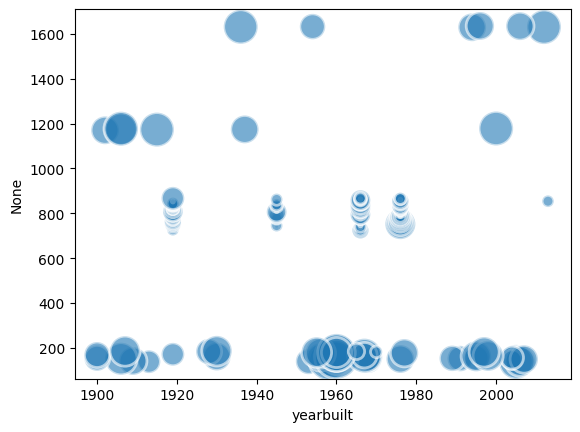

In [68]:
sns.scatterplot(data=metadata_non_encoded,x=metadata_non_encoded["yearbuilt"], y=metadata_non_encoded["rating"].index,
                size=metadata_non_encoded["numberoffloors"],
                legend=False,
                sizes=(5, 1000),
                cmap="Accent",
                alpha=0.6,
                edgecolors="white",
                linewidth=2)


In [ ]:
metadata["yearbuilt"] # Your code here

136        NaN
137        NaN
138     2005.0
139     1913.0
140     1953.0
         ...  
1631    1936.0
1632    1954.0
1633       NaN
1634    2006.0
1635    1996.0
Name: yearbuilt, Length: 251, dtype: float64

In [21]:
# check
# should return an empty dataframe, as we are not supposed to have nan values anymore
metadata["yearbuilt"].loc[metadata["yearbuilt"].isna()]

136    NaN
137    NaN
143    NaN
147    NaN
158    NaN
169    NaN
171    NaN
173    NaN
174    NaN
175    NaN
176    NaN
763    NaN
1171   NaN
1172   NaN
1176   NaN
1200   NaN
1201   NaN
1202   NaN
1203   NaN
1204   NaN
1205   NaN
1206   NaN
1207   NaN
1208   NaN
1209   NaN
1210   NaN
1211   NaN
1212   NaN
1213   NaN
1214   NaN
1215   NaN
1216   NaN
1217   NaN
1218   NaN
1219   NaN
1220   NaN
1221   NaN
1222   NaN
1223   NaN
1224   NaN
1225   NaN
1226   NaN
1227   NaN
1228   NaN
1229   NaN
1230   NaN
1231   NaN
1232   NaN
1233   NaN
1234   NaN
1235   NaN
1633   NaN
Name: yearbuilt, dtype: float64

#### ⚙️ Solution

In [ ]:
metadata["yearbuilt"].loc[metadata["yearbuilt"].isna()] = tree.predict(missing_X).astype(int)

/tmp/ipykernel_2372/2202934034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata["yearbuilt"].loc[metadata["yearbuilt"].isna()] = tree.predict(missing_X).astype(int)


### 🎢 Saving our work

In [ ]:
# full_df.to_csv("../../kaggle_data/tutorial_results/02.csv")
metadata.to_csv("../kaggle_data/tutorial_results/02_metadata.csv")